In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('pharma_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              253973 non-null  int64  
 1   brand_name              253973 non-null  object 
 2   manufacturer            253973 non-null  object 
 3   price_inr               253973 non-null  float64
 4   is_discontinued         253973 non-null  bool   
 5   dosage_form             253973 non-null  object 
 6   pack_size               253973 non-null  float64
 7   pack_unit               253973 non-null  object 
 8   num_active_ingredients  253973 non-null  int64  
 9   primary_ingredient      253973 non-null  object 
 10  primary_strength        253973 non-null  object 
 11  active_ingredients      253973 non-null  object 
 12  therapeutic_class       253973 non-null  object 
 13  packaging_raw           253973 non-null  object 
 14  manufacturer_raw    

In [4]:
dataset.dtypes

product_id                  int64
brand_name                 object
manufacturer               object
price_inr                 float64
is_discontinued              bool
dosage_form                object
pack_size                 float64
pack_unit                  object
num_active_ingredients      int64
primary_ingredient         object
primary_strength           object
active_ingredients         object
therapeutic_class          object
packaging_raw              object
manufacturer_raw           object
dtype: object

In [6]:
dataset.head()

,product_id,brand_name,manufacturer,price_inr,is_discontinued,dosage_form,pack_size,pack_unit,num_active_ingredients,primary_ingredient,primary_strength,active_ingredients,therapeutic_class,packaging_raw,manufacturer_raw
0,1,Augmentin 625 Duo Tablet,Glaxo SmithKline Pharmaceuticals Ltd,223.42,False,tablet,10.0,strip,2,Amoxycillin,500mg,"[{'name': 'Amoxycillin', 'strength': '500mg', ...",antibiotic,strip of 10 tablets,Glaxo SmithKline Pharmaceuticals Ltd
1,2,Azithral 500 Tablet,Alembic Pharmaceuticals Ltd,132.36,False,tablet,5.0,strip,1,Azithromycin,500mg,"[{'name': 'Azithromycin', 'strength': '500mg',...",antibiotic,strip of 5 tablets,Alembic Pharmaceuticals Ltd
2,3,Ascoril LS Syrup,Glenmark Pharmaceuticals Ltd,118.00,False,syrup,100.0,bottle,2,Ambroxol,30mg/5ml,"[{'name': 'Ambroxol', 'strength': '30mg/5ml', ...",bronchodilator,bottle of 100 ml Syrup,Glenmark Pharmaceuticals Ltd
3,4,Allegra 120mg Tablet,Sanofi India Ltd,218.81,False,tablet,10.0,strip,1,Fexofenadine,120mg,"[{'name': 'Fexofenadine', 'strength': '120mg',...",antihistamine,strip of 10 tablets,Sanofi India Ltd
4,5,Avil 25 Tablet,Sanofi India Ltd,10.96,False,tablet,15.0,strip,1,Pheniramine,25mg,"[{'name': 'Pheniramine', 'strength': '25mg', '...",other,strip of 15 tablets,Sanofi India Ltd


### Qs 1) What does the is_discontinued column tell us, and how would you analyze it?

In [8]:
#False → Product is currently available

#True → Product has been discontinued

In [9]:
dataset['is_discontinued'].value_counts()

is_discontinued
False    246068
True       7905
Name: count, dtype: int64

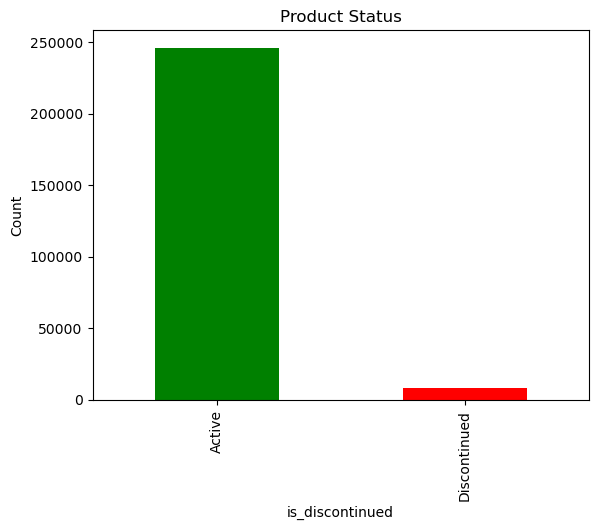

In [10]:
dataset['is_discontinued'].value_counts().plot(kind='bar', color=['green','red'])
plt.xticks([0,1],['Active','Discontinued'])
plt.title('Product Status')
plt.ylabel('Count')
plt.show()

In [12]:
#Analyze by Dosage Form
dataset.groupby('dosage_form')['is_discontinued'].mean().sort_values(ascending=False)

dosage_form
inhaler       0.209738
spray         0.095628
respules      0.090164
powder        0.076923
gel           0.062833
other         0.059294
ointment      0.056920
solution      0.047566
cream         0.040229
drops         0.037296
capsule       0.031350
injection     0.030801
tablet        0.030448
syrup         0.019824
suspension    0.016995
Name: is_discontinued, dtype: float64

In [13]:
dataset.groupby('is_discontinued')['price_inr'].describe()

,count,mean,std,min,25%,50%,75%,max
is_discontinued,,,,,,,,
False,246068.0,265.002121,3028.003408,0.00,48.0,79.0,140.0,436000.0
True,7905.0,442.629725,3073.608370,1.25,40.3,77.0,149.0,110700.0


## Qs2)How would you find the average price of each dosage form?

In [14]:
dataset.groupby('dosage_form')['price_inr'].mean().sort_values(ascending=False)

dosage_form
solution      1130.632677
injection      893.375552
inhaler        472.815131
other          462.836402
powder         391.151910
spray          376.610628
capsule        315.301660
tablet         163.554909
respules       156.661967
gel            150.467736
cream          132.384747
ointment       125.009575
drops           89.337565
suspension      82.002697
syrup           70.845032
Name: price_inr, dtype: float64

## Qs3) How many products are manufactured by each company?

In [15]:
dataset['manufacturer'].value_counts()

manufacturer
Sun Pharmaceutical Industries Ltd    2986
Cipla Ltd                            2467
Intas Pharmaceuticals Ltd            2302
Torrent Pharmaceuticals Ltd          2027
Alkem Laboratories Ltd               1809
                                     ... 
Target Dermacare Private Limited        1
Enactis Healthcare Pvt Ltd              1
Rakesh Pharmaceuticals                  1
Saiva Healthcare                        1
Anamiva Life Sciences                   1
Name: count, Length: 7648, dtype: int64

In [16]:
# top 10
dataset['manufacturer'].value_counts().head(10)

manufacturer
Sun Pharmaceutical Industries Ltd    2986
Cipla Ltd                            2467
Intas Pharmaceuticals Ltd            2302
Torrent Pharmaceuticals Ltd          2027
Alkem Laboratories Ltd               1809
Abbott                               1777
Zydus Cadila                         1768
Lupin Ltd                            1735
Micro Labs Ltd                       1305
Mankind Pharma Ltd                   1297
Name: count, dtype: int64

## Qs4) Which therapeutic class has the highest average price?

In [18]:
dataset.groupby('therapeutic_class')['price_inr'].mean().sort_values(ascending=False)

therapeutic_class
other               413.749735
corticosteroid      124.893605
diuretic            101.110909
antibiotic           99.639244
antidiabetic         92.677786
antihypertensive     83.117041
antacid              81.536670
antidepressant       73.629928
antihistamine        71.298426
bronchodilator       67.923108
analgesic            60.553059
Name: price_inr, dtype: float64

In [19]:
dataset.groupby('therapeutic_class')['price_inr'].mean().sort_values(ascending=False).head(1)

therapeutic_class
other    413.749735
Name: price_inr, dtype: float64

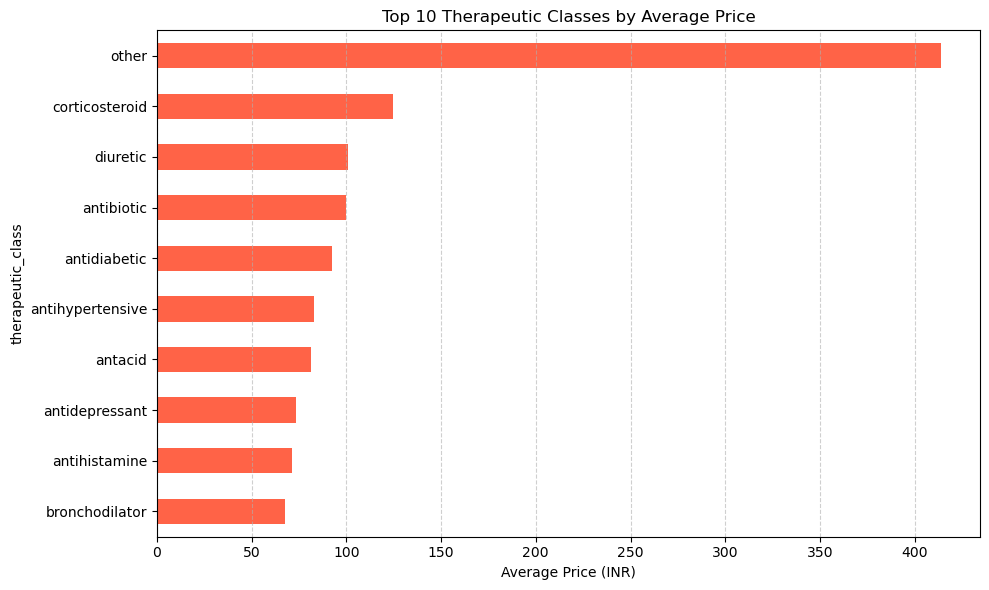

In [20]:
# Top 10 classes by average price
avg_price = dataset.groupby('therapeutic_class')['price_inr'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10,6))
avg_price.plot(kind='barh', color='tomato')
plt.title('Top 10 Therapeutic Classes by Average Price')
plt.xlabel('Average Price (INR)')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Qs4) Find the most expensive product for each therapeutic class.

In [21]:
dataset['therapeutic_class'].value_counts()

therapeutic_class
other               144119
antibiotic           30660
analgesic            24105
antacid              17432
antihistamine        13414
antidiabetic          8957
antihypertensive      7324
corticosteroid        2968
antidepressant        2499
bronchodilator        1802
diuretic               693
Name: count, dtype: int64

In [22]:
dataset.groupby('therapeutic_class')['price_inr'].sum().sort_values(ascending=False)

therapeutic_class
other               59629198.12
antibiotic           3054939.21
analgesic            1459631.49
antacid              1421347.24
antihistamine         956397.08
antidiabetic          830114.93
antihypertensive      608749.21
corticosteroid        370684.22
antidepressant        184001.19
bronchodilator        122397.44
diuretic               70069.86
Name: price_inr, dtype: float64

In [24]:
dataset.groupby('therapeutic_class')['price_inr'].idxmax()

therapeutic_class
analgesic            61291
antacid             166103
antibiotic           72815
antidepressant       74474
antidiabetic        233899
antihistamine       141229
antihypertensive     73115
bronchodilator      200610
corticosteroid      162024
diuretic             37660
other               113862
Name: price_inr, dtype: int64

In [25]:
idx = dataset.groupby('therapeutic_class')['price_inr'].idxmax()
dataset.loc[idx, ['therapeutic_class', 'brand_name', 'manufacturer', 'price_inr', 'dosage_form', 'primary_ingredient']]

,therapeutic_class,brand_name,manufacturer,price_inr,dosage_form,primary_ingredient
61291,analgesic,D Touch 100mg Patch,Sparsha Pharma International Pvt Ltd,1800.00,other,Diclofenac
166103,antacid,Omp D Capsule,Torrent Pharmaceuticals Ltd,964.60,capsule,Domperidone
72815,antibiotic,Elores 3000mg Injection,Venus Remedies Ltd,2274.67,injection,Ceftriaxone
74474,antidepressant,Elpram C 10mg/0.5mg Tablet,Psycogen Captab,700.00,tablet,Clonazepam
233899,antidiabetic,Vokanamet 50mg/500mg Tablet,Johnson & Johnson Ltd,1920.00,tablet,Canagliflozin
141229,antihistamine,Manofex 180mg Tablet,Cmg Biotech Pvt Ltd,388.00,tablet,Fexofenadine
73115,antihypertensive,Exforge 10 mg/160 mg Tablet,Novartis India Ltd,840.38,tablet,Amlodipine
200610,bronchodilator,Salbair I Neb 1.25 Transpules 2.5ml,Lupin Ltd,487.50,other,Levosalbutamol
162024,corticosteroid,Ozurdex Injection,Allergan India Pvt Ltd,35000.00,injection,Dexamethasone Intravitreal Implant
37660,diuretic,CO Diovan Fct 160/25 Tablet,Novartis India Ltd,1018.00,tablet,Valsartan


## Qs5) How would you find all products that contain more than one active ingredient?

In [26]:
# Count commas (indicating multiple ingredients)
multi_ingredient = dataset[dataset['active_ingredients'].str.count(',') >= 1]

# Optional: display relevant columns
multi_ingredient[['brand_name', 'active_ingredients']]


,brand_name,active_ingredients
0,Augmentin 625 Duo Tablet,"[{'name': 'Amoxycillin', 'strength': '500mg', ..."
1,Azithral 500 Tablet,"[{'name': 'Azithromycin', 'strength': '500mg',..."
2,Ascoril LS Syrup,"[{'name': 'Ambroxol', 'strength': '30mg/5ml', ..."
3,Allegra 120mg Tablet,"[{'name': 'Fexofenadine', 'strength': '120mg',..."
4,Avil 25 Tablet,"[{'name': 'Pheniramine', 'strength': '25mg', '..."
...,...,...
253968,Ziyapod 100mg Oral Suspension,"[{'name': 'Cefpodoxime Proxetil', 'strength': ..."
253969,Zemhart 30mg Tablet,"[{'name': 'Diltiazem', 'strength': '30mg', 'fu..."
253970,Zivex 25mg Tablet,"[{'name': 'Hydroxyzine', 'strength': '25mg', '..."
253971,ZI Fast 500mg Injection,"[{'name': 'Azithromycin', 'strength': '500mg',..."


## Qs6) The pack_size column is an object type. How would you convert it to numeric and handle errors?

In [28]:
# dataset['pack_size'] = pd.to_numeric(dataset['pack_size'], errors= 'coerce')

In [27]:
dataset.dtypes

product_id                  int64
brand_name                 object
manufacturer               object
price_inr                 float64
is_discontinued              bool
dosage_form                object
pack_size                 float64
pack_unit                  object
num_active_ingredients      int64
primary_ingredient         object
primary_strength           object
active_ingredients         object
therapeutic_class          object
packaging_raw              object
manufacturer_raw           object
dtype: object

## 7) How do you standardize dosage forms (e.g., “Tablet”, “tablet”, “TABLET”)?

In [29]:
#  dataset['dosage_form'] = dataset['dosage_form'].str.lower().str.strip()
